In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def modelo(r, t, mu):
    x, y = r
    dx = mu * (x - x**3/3 -y)
    dy = x / mu
    return dx, dy

def perturbacionPeriodica(r0, mu, dt, tp, p, N):
    n = int(tp / dt)
    t = np.linspace(0, tp, n)
    r = odeint(modelo, r0, t, args=(mu,))
    for i in range(1, N+1):
        tt = np.linspace(i*tp, (i+1)*tp, n)
        rr = odeint(modelo, r[-1] + np.array([p, 0]), tt, args=(mu,))
        t = np.concatenate([t, tt])
        r = np.concatenate([r, rr], axis=0)
    return t, r

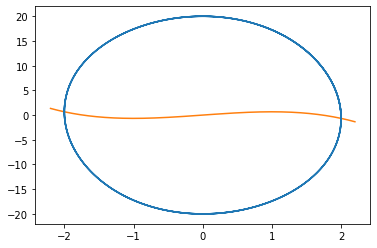

In [112]:
mu = .1

t = np.linspace(0, 20, 20000)

L = 2


x = np.linspace(-L-.2, L+.2, 500)
plt.plot(x, x - x**3/3, color='C1')

r0 = [L, 0]
r = odeint(modelo, r0, t, args=(mu,))
plt.plot(r[:, 0], r[:, 1], color="C0")



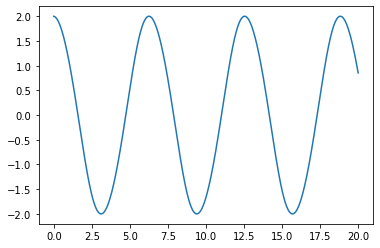

In [113]:
plt.plot(t[:], r[:, 0])

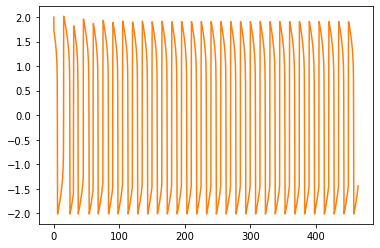

In [133]:
mu = 10
L = 2
r0 = [L, 0]

dt = .1
tp = 15
p = 0.
N = 30
#t, r = perturbacionPeriodica(r0, mu, dt, tp, p, N)
#plt.plot(t, r[:, 0], color='C0')

p = 1.5
t, r = perturbacionPeriodica(r0, mu, dt, tp, p, N)
plt.plot(t, r[:, 0], color='C1')


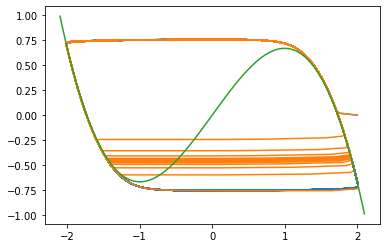

In [131]:
dt = .1
tp = 15
p = 0
N = 40
t, r = perturbacionPeriodica(r0, mu, dt, tp, p, N)
plt.plot(r[:, 0], r[:, 1], color='C0')

p = 1.5
t, r = perturbacionPeriodica(r0, mu, dt, tp, p, N)
plt.plot(r[:, 0], r[:, 1], color='C1')

x = np.linspace(-2.1, 2.1, 200)
plt.plot(x, x - x**3/3, color='C2')


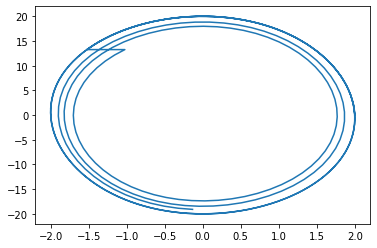

In [54]:
mu = .1
L = 2
r0 = [L, 0]

dt = .1
tp = 15
p = 0.5
N = 1
t, r = perturbacionPeriodica(r0, mu, dt, tp, p, N)
plt.plot(r[:, 0], r[:, 1])

#N = 30
#p = 1.56
#t, r = perturbacionPeriodica(r0, mu, dt, tp, p, N)
#plt.plot(r[30000:, 0], r[30000:, 1])

In [49]:
len(t)

24000